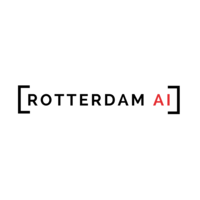

# Week 4: Exploratory Data Analysis

- Exploratory Data Analysis
- Analysing datasets to summarize their main characteristics, usually with visual methods
- Performing investigation on data to:
   - discover patterns
   - detect anomalies
   - test hypothesis 
   - check assumption,

using summary statistics and graphical representations

## Read data

In [ ]:
import pandas as pd

salaries_url = 'https://rotterdamai001.blob.core.windows.net/python/mlb/core/Salaries.csv'
sal_df = pd.read_csv(salaries_url)

In [ ]:
sal_df.dtypes

In [ ]:
sal_df.head()

In [ ]:
sal_df.info()

In [ ]:
sal_df.describe()

**Inference**
- Year ranges from 1985 - 2016
- Minimum salary is zero and maximum salary is 33M 

Before starting our analysis, it is important to understand what type of data is stored in our dataset
- Generally, there are two broad types of variables (columns) in a dataset - Numerical and Categorical variables 
- Read more about variables here (http://www-ist.massey.ac.nz/dstirlin/CAST/CAST/Hstructures/structures_c2.html)

In [ ]:
#######################################################
################### Challenge 1  ######################
#######################################################
# For each variable in salaries dataframe, identify it's type 

### Use Case: We are scouting for baseball players so we want to understand dynamics behind the players salary. To do so, we start investigating their salaries over time to get to know our data a bit better

### 1. First, let's try to understand how salaries are distributed

In [ ]:
#Import packages
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
salary = sal_df['salary']

**Min and Max are quite different, between 0 to 30 Million. Lets look at the distribution**

In [ ]:
plt.hist(salary, bins = 200);

In [ ]:
plt.hist(salary, bins = 200); 
plt.axvline(salary.mean(), color='r', linestyle='dashed', linewidth=1);
plt.axvline(salary.median(), color='g', linestyle='dashed', linewidth=1);

- This kind of analysis where you try to understand a single variable (salary) is called **univariate analysis**
- The main purpose of univariate analysis is to describe the data and find patterns that exist within it

In [ ]:
#######################################################
################### Challenge 2  ######################
#######################################################

#  Now try to plot the salary distribution for a specific year, say, 2013


**Inference**
- It shows a so-called '**long-tail**' distribution, which means there is a high variance in data
- i.e., a lot of players have a similar 'base salary' (between about 0 - 10M) but very few players have very high salaries (long-tail)

**Lets zoom-in in the first part, where most of the data is concentrated**

In [ ]:
lower_than_million = sal_df['salary'][sal_df['salary'] < 1000000]
plt.hist(lower_than_million, bins = 200); 

**We can also set paramets in the plotting part and obtain similar results**

In [ ]:
#Zoom in to 2013 salary data - Method 2
plt.hist(year_data['salary'], bins = 200); 
plt.xlim(0,1000000);

In [ ]:
#######################################################
################### Challenge 3  ######################
#######################################################

# Now try to make a function that given a year, can plot the salaries lower than one million!

In [ ]:
#TIP: You can also plot distributions of all numerical values in a dataset using one line
sal_df.hist(bins=50);

**Let's try to see how salary is influenced by other factors** 

### 2. Salary vs Year
**How could we plot year and salary against each other?**

In [ ]:
plt.scatter(sal_df['yearID'], sal_df['salary']);

**The Y column seems weird, the salaries are higher than 3.0..? Lets make it clearer**

In [ ]:
plt.scatter( sal_df['yearID'], sal_df['salary']);
plt.ylabel('salary in 10 MLN $');
plt.xlabel('Year');
plt.title('Salaries over time');

In [ ]:
med_salary_over_time = sal_df.groupby(['yearID'])['salary'].median()
mean_salary_over_time = sal_df.groupby(['yearID'])['salary'].mean()

In [ ]:
plt.plot(med_salary_over_time, label = 'median');
plt.plot(mean_salary_over_time, label = 'mean');
plt.legend();

**Inference**
- average salaries increased over time (inflation could play a role)
- our data availability is higher over time (or maybe just more players are playing baseball) 



- We now analysed two variables, salary and year, simultaneously. This is called bi-variate analysis
- Bivariate analysis is used to find out if there is a relationship between two different variables.

**Salaries could also be different for different countries**

### 3. Salary vs Year vs Country
**How does salary vary over time per country?** (Multi-variate analysis)

In [ ]:
#First, lets find how many countries are there
countries = sal_df.lgID.unique()
print(countries)

- Country is a categorical value
- Lets differentiate countries using color coding

In [ ]:
import matplotlib.cm as cm
import numpy as np 

colors = cm.brg(np.linspace(0, 1, len(countries))) #Assigns a color (in RGBA) from the 'rainbow' palette to each country
col = []

col = [colors[0] if x=='NL' else colors[1] for x in sal_df.lgID]
scatter = plt.scatter( sal_df['yearID'], sal_df['salary'], c = col);
plt.ylabel('salary in MLN $');
plt.xlabel('Year');
plt.title('Salaries over time');

In [ ]:
#######################################################
################### Challenge 4  ######################
#######################################################

# Make the chart more readable by adding a legend


Read more about colormap representation here: https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html

Best practices for using colors in a visualization: 
 - https://theblog.adobe.com/the-power-of-the-palette-why-color-is-key-in-data-visualization-and-how-to-use-it/
 - https://blog.datawrapper.de/colors/

### Certain teams might have a bigger budget compared to others. Let's see how salary varies  between the teams

### 4. Salary vs Team

**Let's focus on latest salaries (year > 2015)**

In [ ]:
latest_data = sal_df.loc[sal_df['yearID'] >= 2015]
plt.figure(figsize=(20, 5))
plt.scatter( latest_data['teamID'], latest_data['salary']);
plt.ylabel('salary in 10 MLN $');
plt.xlabel('TeamID');
plt.title('Salaries per team');

**Now let's use box-plot to understand the distribution**

Boxplots are a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

In [ ]:
sns.boxplot(x="teamID", y="salary", data=latest_data);
plt.xticks(rotation = 90);

### 5. Team composition

In [ ]:
grouped = latest_data.groupby(['teamID'])
count_team = grouped['playerID'].count()

print("Number of teams: ", len(count_team))
print(count_team.head())

plt.figure(figsize=(15, 5))
plt.bar(count_team.index, count_team);
plt.title('Number of players per team');

### Important! Remember before drawing conclusions from your analysis
 - Correlation is not Causation. Just because two things appear to be related to one another doesn't mean that one causes the other. (http://www.tylervigen.com/spurious-correlations)